In [1]:
# Importing necessary libraries
import pandas as pd  # Data manipulation
import numpy as np   # Numerical computations
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Plotting

# Configuration for scikit-learn
from sklearn import set_config

# Model selection and evaluation
from sklearn.model_selection import train_test_split, cross_validate

# Data preprocessing
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer

# Imputation
from sklearn.impute import KNNImputer, SimpleImputer 

# Composing
from sklearn.compose import ColumnTransformer

# Feature selection
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# Pipeline
from sklearn.pipeline import make_pipeline

# Classification models
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# Magic command for inline plotting
%matplotlib inline

# Setting plot style
plt.style.use('ggplot')

# Setting pandas options to display all columns
pd.set_option('display.max_columns', None)

# Setting scikit-learn configuration to display pipeline diagrams
set_config(display='diagram')

# Data Acquisition

In [2]:
# Loading Titanic dataset from a CSV file
titanic_data = pd.read_csv('../data/train.csv')

# Displaying the loaded dataset
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#  Data Quality Check

In [3]:
# Checking the dimensions of the Titanic dataset
titanic_data.shape

(891, 12)

In [4]:
# Counting the number of columns with each data type in the Titanic dataset
titanic_data.dtypes.value_counts()

int64      5
object     5
float64    2
Name: count, dtype: int64

In [5]:
# Displaying a concise summary of the Titanic dataset
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Checking for missing values in the Titanic dataset and displaying columns with missing values
titanic_data.isnull().sum().loc[titanic_data.isnull().sum() > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [7]:
# Counting the number of unique values in each column of the Titanic dataset
titanic_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [8]:
# Counting the frequency of each unique value in the 'Cabin' column of the Titanic dataset
titanic_data['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [9]:
# Calculating the variance of numerical columns in the Titanic dataset
titanic_data.select_dtypes(include='number').var()

PassengerId    66231.000000
Survived           0.236772
Pclass             0.699015
Age              211.019125
SibSp              1.216043
Parch              0.649728
Fare            2469.436846
dtype: float64

In [10]:
# Counting the number of unique values in object-type columns of the Titanic dataset
titanic_data.select_dtypes(include=object).nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [11]:
# Calculating the percentage of unique values in each column of the Titanic dataset
# and rounding the result to two decimal places
(titanic_data.nunique() / titanic_data.shape[0] * 100).round(2)

PassengerId    100.00
Survived         0.22
Pclass           0.34
Name           100.00
Sex              0.22
Age              9.88
SibSp            0.79
Parch            0.79
Ticket          76.43
Fare            27.83
Cabin           16.50
Embarked         0.34
dtype: float64

In [12]:
# Generating descriptive statistics for numerical columns in the Titanic dataset
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Cleaning

In [13]:
# Imputing missing values in the 'Age' column of the Titanic dataset using KNNImputer,
# then rounding up the imputed values and flattening the result to match the original shape
titanic_data['Age'] = np.ceil(KNNImputer(weights='distance').fit_transform(titanic_data[['Age']])).flatten()
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
# Imputing missing values in the 'Embarked' column of the Titanic dataset with the most frequent value,
# then flattening the result to match the original shape
titanic_data['Embarked'] = SimpleImputer(strategy='most_frequent').fit_transform(titanic_data[['Embarked']]).flatten()
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Exploratory Data Analysis

In [15]:
def hist_box_plot(columns):
    """
    Generate histogram and box plot side by side for each specified column.

    Parameters:
    - columns (list): List of column names for which plots will be generated.
    """
    for col in columns:
        # Create a new figure with a specified size
        plt.figure(figsize=(13, 4))
        
        # Create subplot for the histogram
        plt.subplot(1, 2, 1)
        sns.histplot(titanic_data, x=col, kde=True)  # Plot histogram
        plt.title(f'Histogram ({col})')  # Set title for the subplot
        
        # Create subplot for the box plot
        plt.subplot(1, 2, 2)
        sns.boxplot(titanic_data, x=col, width=0.5)  # Plot box plot
        plt.title(f'Box Plot ({col})')  # Set title for the subplot
        
        # Show the plots
        plt.show()

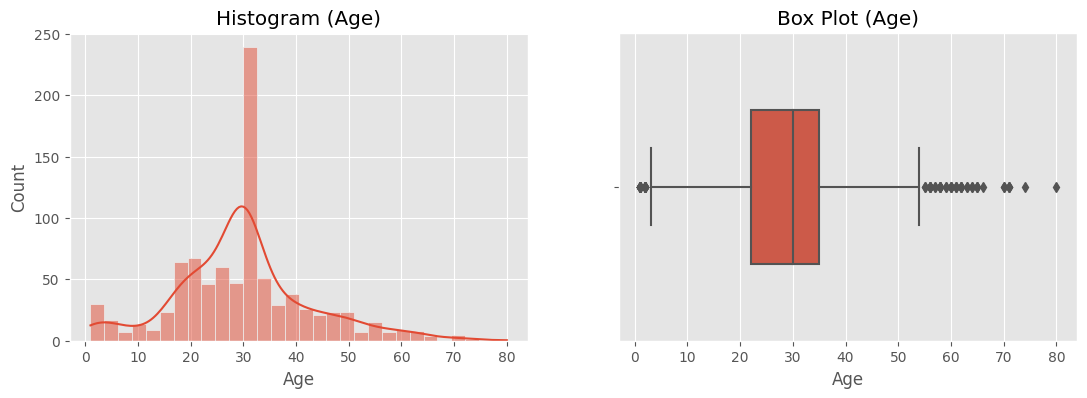

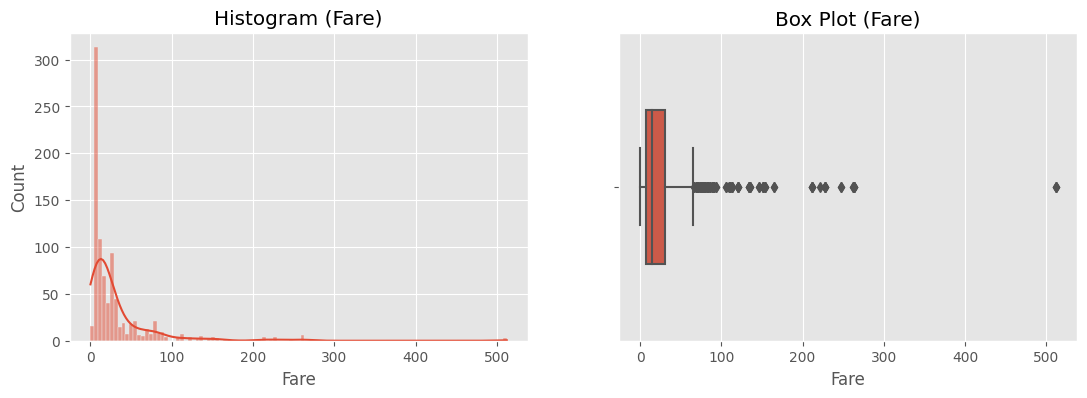

In [16]:
# Generate histogram and box plot side by side for each floating-point column in the Titanic dataset
hist_box_plot(titanic_data.select_dtypes('float').columns)

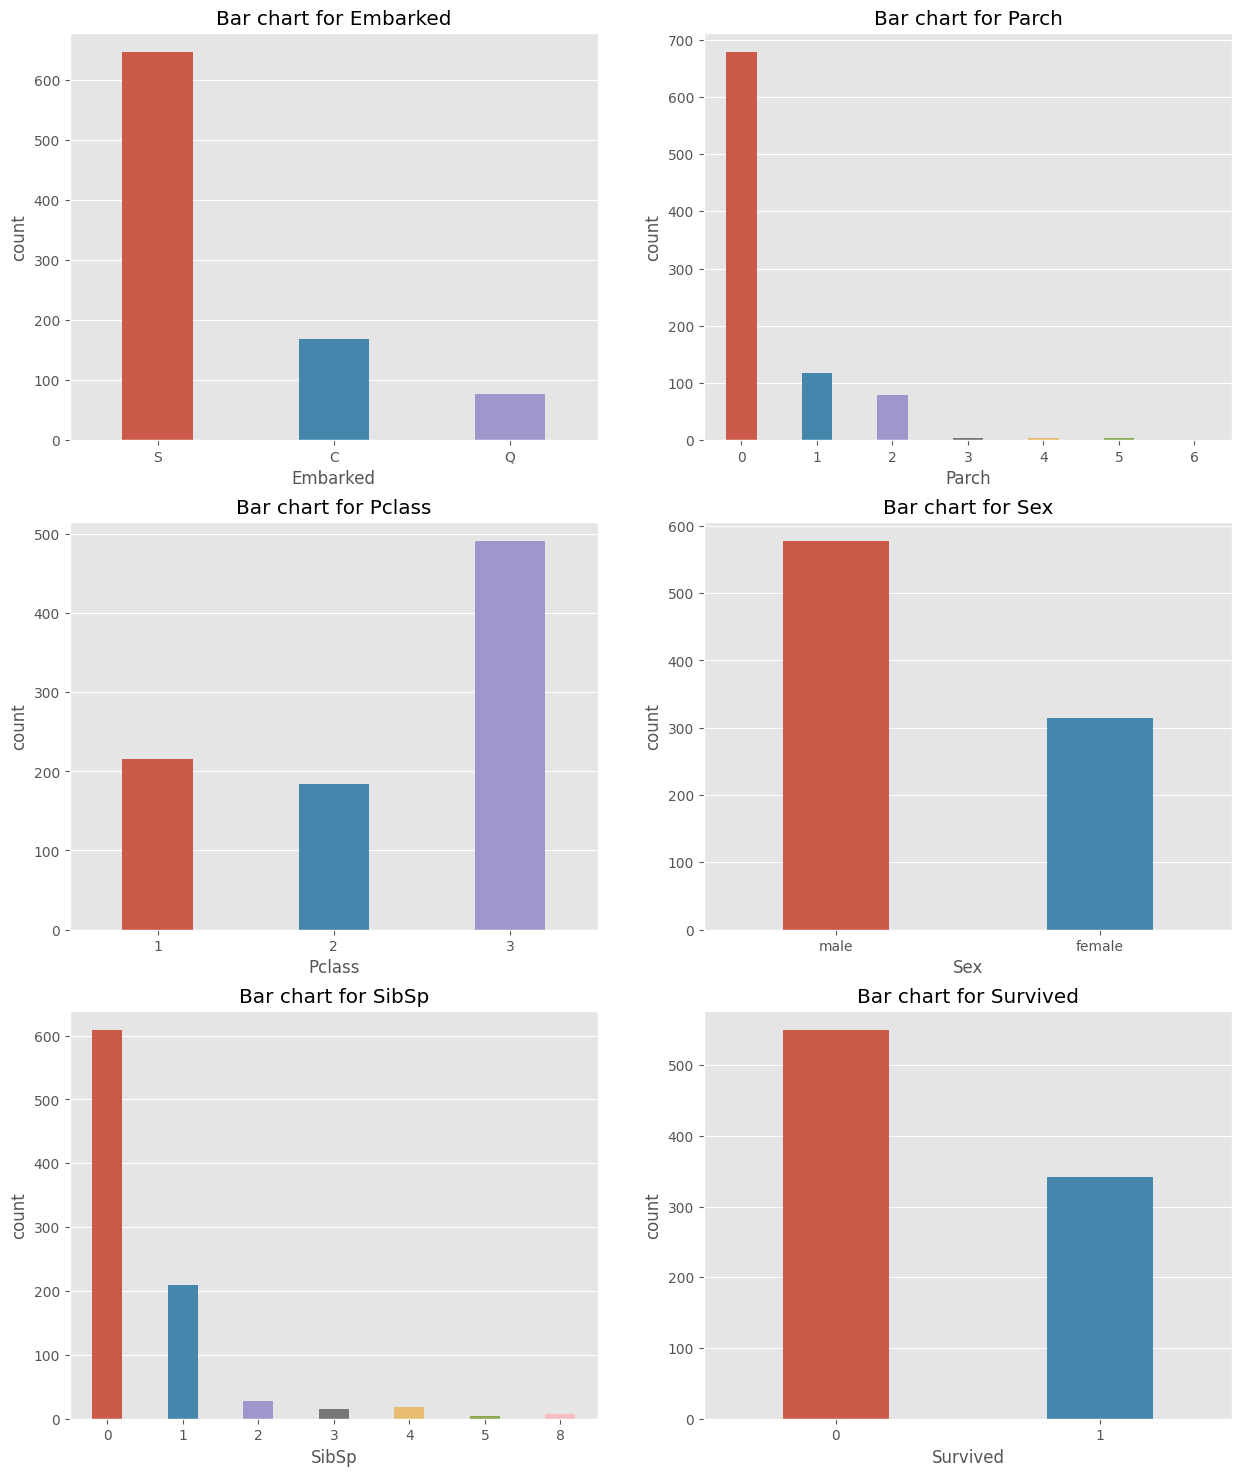

In [17]:
# Selecting columns of integer and object data types, excluding specified columns
columns = titanic_data.select_dtypes(include=['int', 'object']).columns.difference(['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Calculate the number of rows for subplot arrangement
l = len(columns) // 2 if len(columns) % 2 == 0 else len(columns) // 2 + 1

# Create a figure with appropriate size
plt.figure(figsize=(15, l*6))

# Loop through each selected column for plotting
for i, col in enumerate(columns):
    # Create subplots
    plt.subplot(l, 2, i+1)
    
    # Plot countplot for the current column
    sns.countplot(titanic_data, x=col, width=0.4)
    
    # Set title for the subplot
    plt.title(f'Bar chart for {col}')

# Display the plots
plt.show()

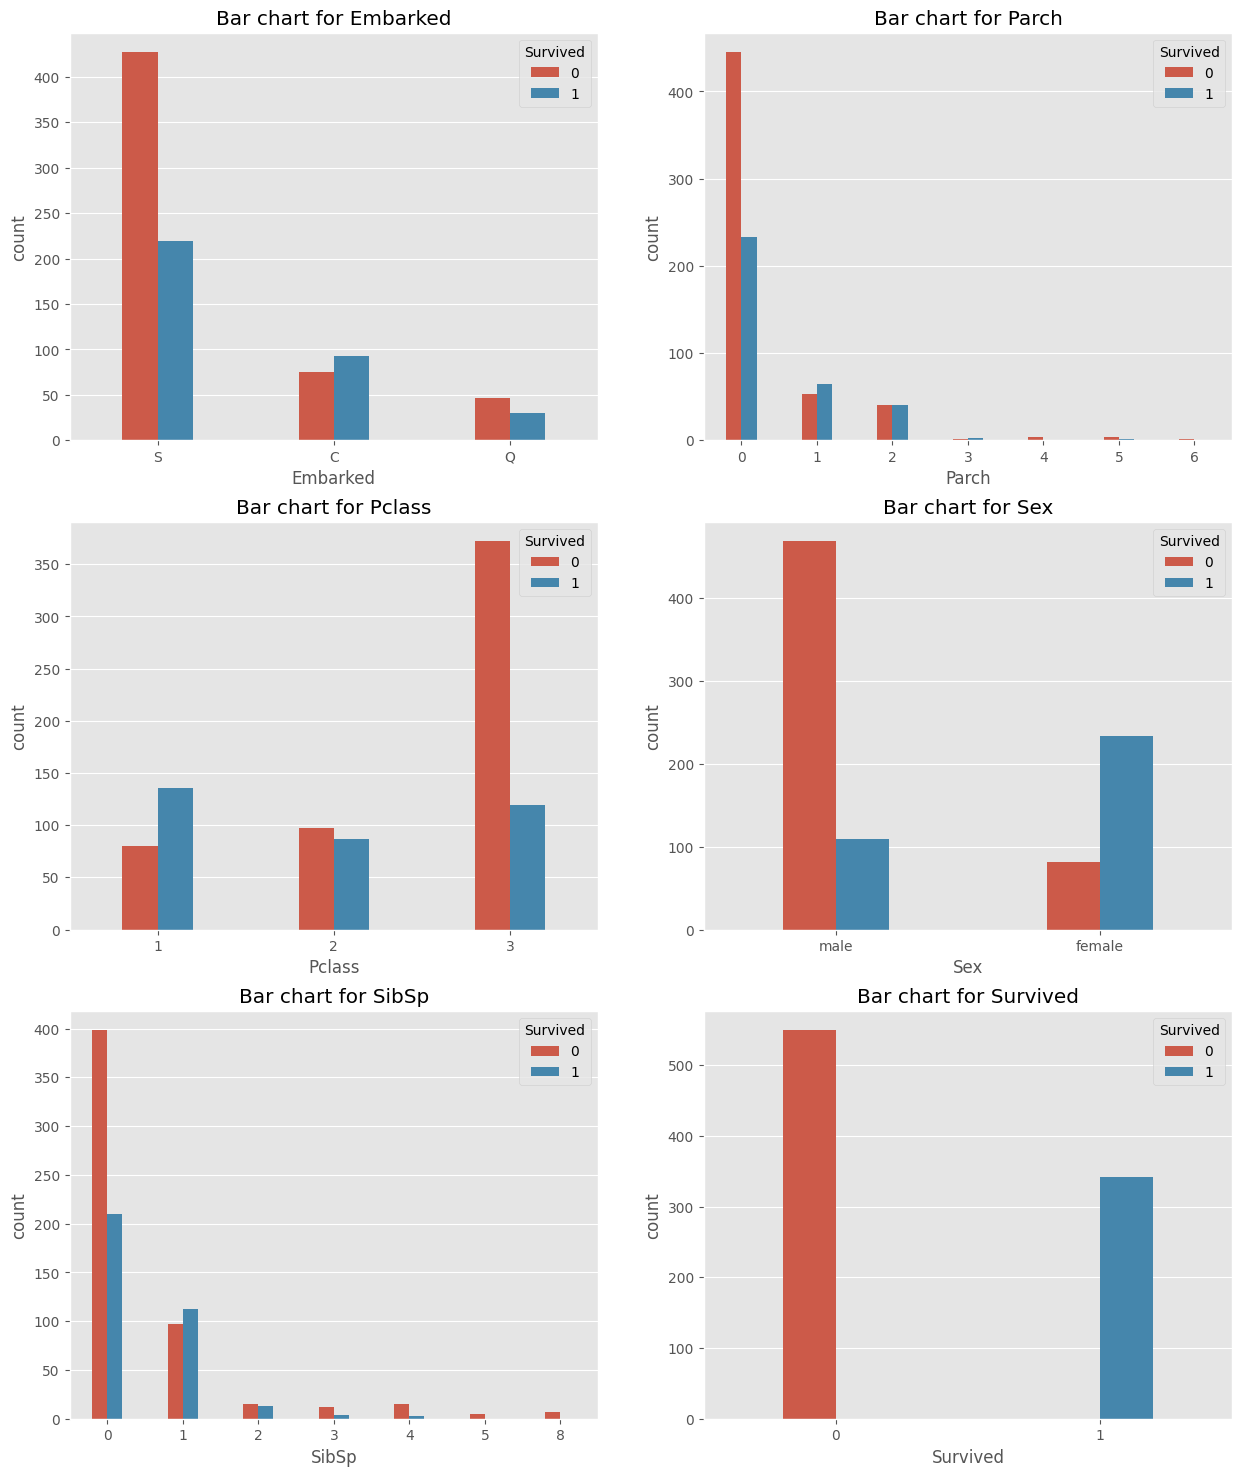

In [18]:
# Selecting columns of integer and object data types, excluding specified columns
columns = titanic_data.select_dtypes(include=['int', 'object']).columns.difference(['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Calculate the number of rows for subplot arrangement
l = len(columns) // 2 if len(columns) % 2 == 0 else len(columns) // 2 + 1

# Create a figure with appropriate size
plt.figure(figsize=(15, l*6))

# Loop through each selected column for plotting
for i, col in enumerate(columns):
    # Create subplots
    plt.subplot(l, 2, i+1)
    
    # Plot countplot for the current column with 'Survived' as hue
    sns.countplot(titanic_data, x=col, hue='Survived', width=0.4)
    
    # Set title for the subplot
    plt.title(f'Bar chart for {col}')
    
# Display the plots
plt.show()

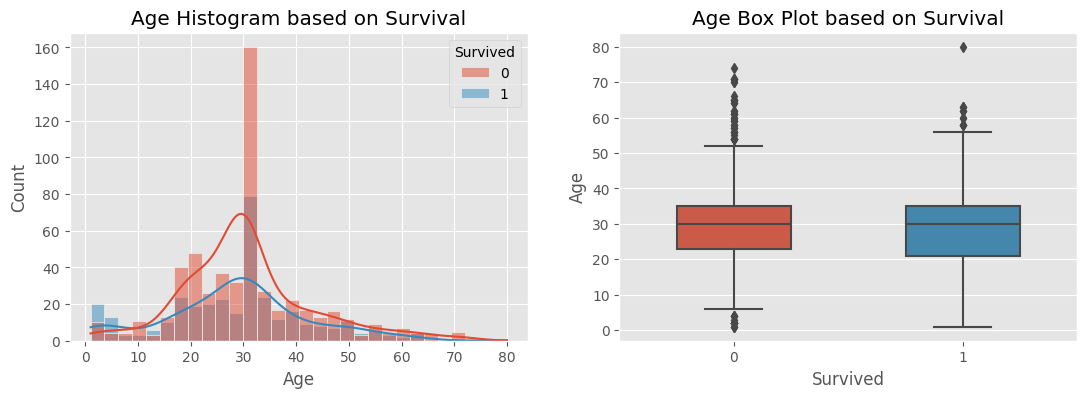

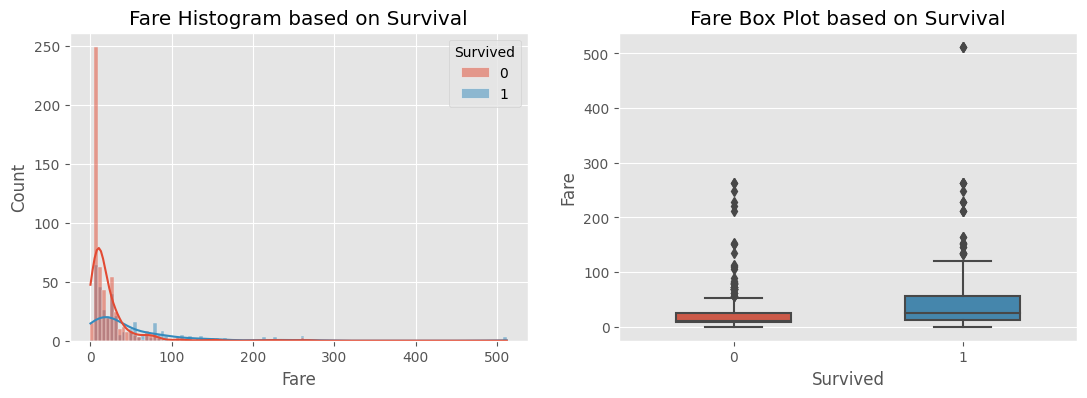

In [19]:
# Selecting columns of floating-point data type
columns = titanic_data.select_dtypes('float').columns

# Loop through each selected column for plotting
for col in columns:
    # Create a new figure with a specified size
    plt.figure(figsize=(13, 4))
    
    # Create subplot for the histogram based on survival
    plt.subplot(1, 2, 1)
    sns.histplot(titanic_data, x=col, kde=True, hue='Survived')
    plt.title(f'{col} Histogram based on Survival')  # Set title for the subplot
    
    # Create subplot for the box plot based on survival
    plt.subplot(1, 2, 2)
    sns.boxplot(titanic_data, x='Survived', y=col, width=0.5)
    plt.title(f'{col} Box Plot based on Survival')  # Set title for the subplot
    
    # Show the plots
    plt.show()

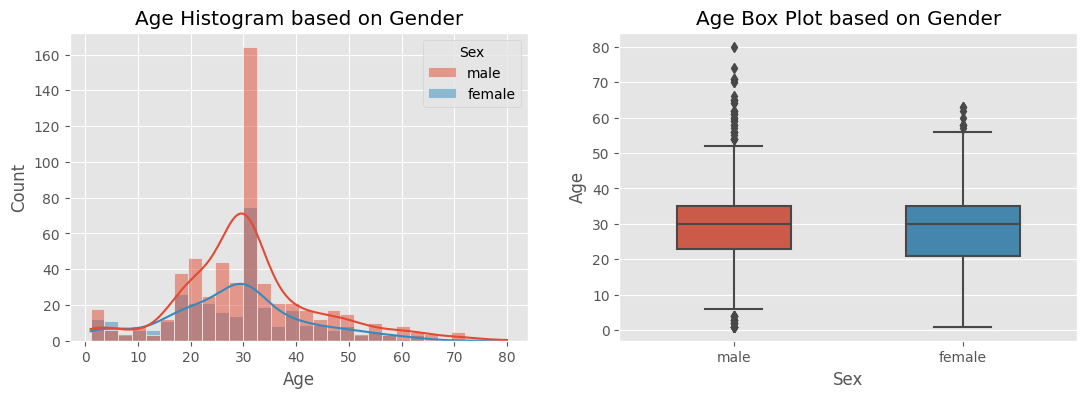

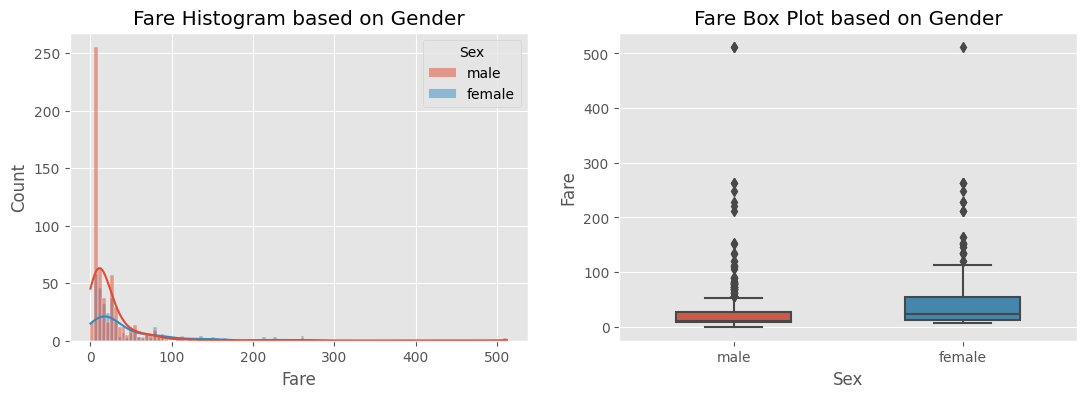

In [20]:
# Selecting columns of floating-point data type
columns = titanic_data.select_dtypes('float').columns

# Loop through each selected column for plotting
for col in columns:
    # Create a new figure with a specified size
    plt.figure(figsize=(13, 4))
    
    # Create subplot for the histogram based on gender
    plt.subplot(1, 2, 1)
    sns.histplot(titanic_data, x=col, kde=True, hue='Sex')
    plt.title(f'{col} Histogram based on Gender')  # Set title for the subplot
    
    # Create subplot for the box plot based on gender
    plt.subplot(1, 2, 2)
    sns.boxplot(titanic_data, x='Sex', y=col, width=0.5)
    plt.title(f'{col} Box Plot based on Gender')  # Set title for the subplot
    
    # Show the plots
    plt.show()

# Feature Engineering

In [21]:
# Extracting titles from the 'Name' column and creating a new 'title' column
titanic_data['title'] = titanic_data['Name'].str.extract(r',\s([A-Za-z]+)')

# Dropping the 'PassengerId' and 'Name' columns from the DataFrame
titanic_data.drop(columns=['PassengerId', 'Name'], inplace=True)

# Displaying the updated DataFrame
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,1,1,female,19.0,0,0,112053,30.0000,B42,S,Miss
888,0,3,female,30.0,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,1,1,male,26.0,0,0,111369,30.0000,C148,C,Mr


In [22]:
# Assigning titles 'Mr', 'Mrs', and 'Miss' to corresponding values in the 'title' column,
# and assigning 'others' to the rest of the values
titanic_data['title'] = np.where(titanic_data['title'].isin(['Mr', 'Mrs', 'Miss']), 
                                 titanic_data['title'], 'others')

# Displaying the updated DataFrame
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S,others
887,1,1,female,19.0,0,0,112053,30.0000,B42,S,Miss
888,0,3,female,30.0,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,1,1,male,26.0,0,0,111369,30.0000,C148,C,Mr


In [23]:
# Converting the 'Cabin' column to a binary indicator: 0 for NaN values, 1 otherwise
titanic_data['Cabin'] = np.where(titanic_data['Cabin'].isna(), 0, 1)

# Displaying the updated DataFrame
titanic_data


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,0,S,Mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,1,C,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,Miss
3,1,1,female,35.0,1,0,113803,53.1000,1,S,Mrs
4,0,3,male,35.0,0,0,373450,8.0500,0,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,0,S,others
887,1,1,female,19.0,0,0,112053,30.0000,1,S,Miss
888,0,3,female,30.0,1,2,W./C. 6607,23.4500,0,S,Miss
889,1,1,male,26.0,0,0,111369,30.0000,1,C,Mr


In [24]:
# Extracting ticket series information from the 'Ticket' column and creating a new binary 'Ticket_series' column
titanic_data['Ticket_series'] = titanic_data['Ticket'].str.extract(r'(^\D+[0-9])')

# Converting the 'Ticket_series' column to a binary indicator: 0 for NaN values, 1 otherwise
titanic_data['Ticket_series'] = np.where(titanic_data['Ticket_series'].isna(), 0, 1)

# Dropping the 'Ticket' column from the DataFrame
titanic_data.drop(columns=['Ticket'], inplace=True)

# Displaying the updated DataFrame
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,title,Ticket_series
0,0,3,male,22.0,1,0,7.2500,0,S,Mr,1
1,1,1,female,38.0,1,0,71.2833,1,C,Mrs,1
2,1,3,female,26.0,0,0,7.9250,0,S,Miss,1
3,1,1,female,35.0,1,0,53.1000,1,S,Mrs,0
4,0,3,male,35.0,0,0,8.0500,0,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,0,S,others,0
887,1,1,female,19.0,0,0,30.0000,1,S,Miss,0
888,0,3,female,30.0,1,2,23.4500,0,S,Miss,1
889,1,1,male,26.0,0,0,30.0000,1,C,Mr,0


# Feature Selection

In [25]:
# Initialize an OrdinalEncoder
oe = OrdinalEncoder()

In [26]:
# Create a copy of the Titanic dataset for feature selection
fs_data = titanic_data.dropna()

# Encode categorical variables using OrdinalEncoder and create a new DataFrame
fs_data_ec = pd.DataFrame(oe.fit_transform(fs_data), columns=fs_data.columns)

# Separate features (X) and target variable (y)
X = fs_data_ec.drop(columns=['Survived'])  # Features (all columns except 'Survived')
y = fs_data_ec.loc[:, 'Survived']          # Target variable (only 'Survived' column)

In [27]:
# Initialize SelectKBest with f_classif scoring function and k='all' to select all features
skb = SelectKBest(f_classif, k='all')

# Fit SelectKBest to the features (X) and target variable (y)
skb.fit(X, y)

# Create a DataFrame to display the selected features along with their scores, p-values, and significance
pd.DataFrame({
    'features': skb.feature_names_in_,       # Selected features
    'scores': skb.scores_,                    # Scores computed by SelectKBest
    'pValues': skb.pvalues_,                  # P-values associated with the scores
    '<0.05': skb.pvalues_ < 0.05              # Significance of features based on p-values (True if < 0.05) # type: ignore
}).sort_values(by=['scores'], ascending=False, ignore_index=True)

,features,scores,pValues,<0.05
0,Sex,372.405724,1.406066e-69,True
1,Pclass,115.031272,2.537047e-25,True
2,Fare,111.583030,1.186340e-24,True
3,Cabin,99.253142,3.090891e-22,True
4,Embarked,25.717286,4.811093e-07,True
5,Parch,5.963464,1.479925e-02,True
6,Age,4.543601,3.331569e-02,True
7,title,1.151016,2.836277e-01,False
8,SibSp,0.619322,4.315093e-01,False
9,Ticket_series,0.001595,9.681528e-01,False


`Observation:`
- `It appears that 'Title', 'SibSp', and 'Ticket_series' are not statistically significant features based on the p-values computed by the SelectKBest algorithm. These features may not provide much predictive power for the target variable ('Survived'). Therefore, they might be considered for removal in feature selection processes to simplify the model without significantly impacting its performance.`

In [28]:
# Initialize Recursive Feature Elimination (RFE) with RidgeClassifier estimator
rfe = RFE(RidgeClassifier())

# Fit RFE to the features (X) and target variable (y)
rfe.fit(X, y)

# Create a DataFrame to display the selected features along with their rankings
pd.DataFrame({
    'features': rfe.feature_names_in_,     # Selected features
    'ranking': rfe.ranking_                 # Rankings assigned to each feature by RFE
}).sort_values(by=['ranking'])              # Sort the DataFrame by ranking

,features,ranking
0,Pclass,1
1,Sex,1
3,SibSp,1
6,Cabin,1
8,title,1
7,Embarked,2
4,Parch,3
2,Age,4
5,Fare,5
9,Ticket_series,6


`Observation:`
- `Features with ranking 1 are considered the most important according to RFE, followed by ranking 2, 3, and so on. Lower rankings indicate higher importance.`

<Axes: >

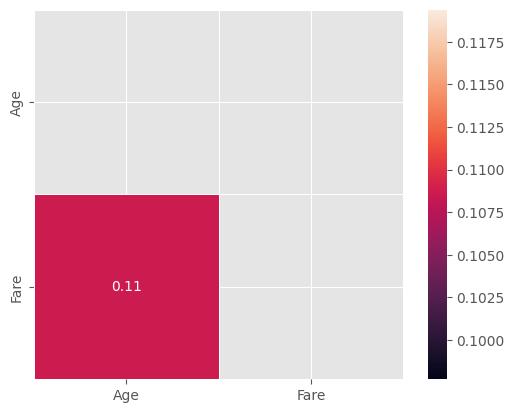

In [29]:
# Create a mask to hide the upper triangle of the correlation matrix
mask = np.triu(np.ones(X[['Age', 'Fare']].corr().shape), k=0)

# Plot a heatmap of the correlation matrix between 'Age' and 'Fare'
sns.heatmap(X[['Age', 'Fare']].corr(), annot=True, lw=0.5, square=True, mask=mask) # type: ignore

`Observation:`
- `The heatmap visualization helps to understand the correlation structure between the 'Age' and 'Fare' features. The correlation coefficient between 'Age' and 'Fare' is approximately 0.108539. Since this coefficient is close to 0, it suggests a weak positive correlation between 'Age' and 'Fare'.`

In [30]:
# Calculate Variance Inflation Factor (VIF) for each feature in X and sort the results by VIF values
sorted_vif = sorted([(col, vif(X, i)) for i, col in enumerate(X.columns)], key=lambda x: x[1])

# Display the sorted VIF results
sorted_vif

[('Ticket_series', 1.3795016878837383),
 ('Parch', 1.7870782183393359),
 ('SibSp', 2.002330118844031),
 ('Cabin', 2.5477372461073817),
 ('title', 3.2468752095792897),
 ('Sex', 3.3593405019708253),
 ('Pclass', 4.543863448583789),
 ('Embarked', 4.5799547837768895),
 ('Age', 6.048305944391559),
 ('Fare', 6.852683888280689)]

`Observation:`
- `These VIF values indicate the degree of multicollinearity among the features. Lower VIF values (closer to 1) suggest less multicollinearity, while higher values suggest stronger multicollinearity. In general, VIF values below 5 are considered acceptable, although the threshold may vary depending on the context and specific requirements of the analysis. Based on these results, 'Ticket_series', 'Parch', and 'SibSp' have the lowest VIF values, indicating relatively low multicollinearity with other features. Conversely, 'Fare' and 'Age' have the highest VIF values, suggesting stronger multicollinearity with other features.`

In [31]:
# Initialize RidgeClassifier with positive=True
rc = RidgeClassifier(positive=True)

# Fit RidgeClassifier to the features (X) and target variable (y)
rc.fit(X, y)

# Create a DataFrame to display the coefficients of the features
pd.DataFrame({
    'features': rc.feature_names_in_,   # Features
    'score': rc.coef_.flatten()         # Coefficients corresponding to each feature
})

,features,score
0,Pclass,0.000000
1,Sex,0.000000
2,Age,0.000000
3,SibSp,0.000000
4,Parch,0.000007
5,Fare,0.004637
6,Cabin,0.000037
7,Embarked,0.000000
8,title,0.000002
9,Ticket_series,0.000000


`Observation:`
- `'Pclass', 'Sex', 'Age', 'SibSp', 'Embarked', and 'Ticket_series' have coefficients close to 0, indicating that these features have negligible impact on the prediction according to the RidgeClassifier model. 'Parch', 'Fare', 'Cabin', and 'Title' have coefficients that are slightly higher but still relatively small compared to the scale of the coefficients. 'Fare' has the highest coefficient among the features, indicating that it has the most significant impact on the prediction among the features considered. It's important to note that the interpretation of the coefficients may vary depending on the context and the specific dataset. In this case, the RidgeClassifier with positive constraints might not assign significant positive coefficients to any of the features, possibly due to the nature of the data or the classifier's behavior.`

# Data Cleaning UDF

In [32]:
ct = ColumnTransformer([
    ('knn', KNNImputer(weights='distance'), ['Age']),
    ('si_mf', SimpleImputer(strategy='most_frequent'), ['Embarked']),
    ('si', SimpleImputer(), ['Fare']),
], remainder='passthrough')

oe = OrdinalEncoder()


def data_cleaning(dataframe: pd.DataFrame) -> pd.DataFrame:
    df = dataframe.copy()
        
    # Extracting titles from the 'Name' column and creating a new 'title' column
    df['title'] = df['Name'].str.extract(r',\s([A-Za-z]+)')

    # Assigning titles 'Mr', 'Mrs', and 'Miss' to corresponding values in the 'title' column,
    # and assigning 'others' to the rest of the values
    df['title'] = np.where(df['title'].isin(['Mr', 'Mrs', 'Miss']), 
                                     df['title'], 'others')
    
    # Converting the 'Cabin' column to a binary indicator: 0 for NaN values, 1 otherwise
    df['Cabin'] = np.where(df['Cabin'].isna(), 0, 1)
    
    # Extracting ticket series information from the 'Ticket' column and creating a new binary 'Ticket_series' column
    df['Ticket_series'] = df['Ticket'].str.extract(r'(^\D+[0-9])')

    # Converting the 'Ticket_series' column to a binary indicator: 0 for NaN values, 1 otherwise
    df['Ticket_series'] = np.where(df['Ticket_series'].isna(), 0, 1)

    # Dropping the 'Ticket'and 'Name' column from the DataFrame
    df.drop(columns=['Name', 'Ticket'], inplace=True)

    return df


In [33]:
def train_clean(data: pd.DataFrame) -> pd.DataFrame:
    ct_data = ct.fit_transform(data)
    ct_data_cols = [x.split('__')[-1] for x in ct.get_feature_names_out()]
    ct_data_df = pd.DataFrame(ct_data, columns=ct_data_cols)  # type: ignore
    df_cleaned = data_cleaning(ct_data_df)
    cat_df = df_cleaned.loc[:, ['Sex', 'Embarked', 'title']]
    df_cleaned.loc[:, ['Sex', 'Embarked', 'title']] = oe.fit_transform(cat_df)
    org_cols = ['PassengerId', 'Pclass', 'title', 'Sex', 'Age', 'SibSp', 
               'Parch', 'Ticket_series', 'Fare', 'Cabin', 'Embarked']
    return df_cleaned.loc[:, org_cols]


def test_clean(data: pd.DataFrame) -> pd.DataFrame:
    ct_data = ct.transform(data)
    ct_data_cols = [x.split('__')[-1] for x in ct.get_feature_names_out()]
    ct_data_df = pd.DataFrame(ct_data, columns=ct_data_cols)  # type: ignore
    df_cleaned = data_cleaning(ct_data_df)
    cat_df = df_cleaned.loc[:, ['Sex', 'Embarked', 'title']]
    df_cleaned.loc[:, ['Sex', 'Embarked', 'title']] = oe.transform(cat_df)
    org_cols = ['PassengerId', 'Pclass', 'title', 'Sex', 'Age', 'SibSp', 
               'Parch', 'Ticket_series', 'Fare', 'Cabin', 'Embarked']
    return df_cleaned.loc[:, org_cols]



# Splitting the data

In [34]:
# Read the Titanic dataset from the CSV file
titanic_data = pd.read_csv('../data/train.csv')

# Perform data cleaning on the Titanic dataset to prepare features (X) and target variable (y)
# Assuming the function `data_cleaning()` performs preprocessing steps such as handling missing values,
# encoding categorical variables, feature engineering, etc.
# Drop the 'Survived' column to create the feature matrix X
X = titanic_data.drop(columns=['Survived'])

# Extract the target variable 'Survived' to create the target vector y
y = titanic_data.loc[:, 'Survived']


In [35]:
# Split the dataset into training and testing sets
# X_train: Features for training
# X_test: Features for testing
# y_train: Target variable for training
# y_test: Target variable for testing
# test_size=0.3: Split ratio where 30% of the data is allocated to the test set
# stratify=y: Ensures that the class distribution of the target variable 'y' is preserved in the train/test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [36]:
train_clean(X_train)#.loc[train_clean(X_train)['PassengerId'] == 14]


,PassengerId,Pclass,title,Sex,Age,SibSp,Parch,Ticket_series,Fare,Cabin,Embarked
0,593,3,1.0,1.0,47.0,0,0,1,7.25,0,2.0
1,197,3,1.0,1.0,30.057858,0,0,0,7.75,0,1.0
2,349,3,3.0,1.0,3.0,1,1,1,15.9,0,2.0
3,645,3,0.0,0.0,0.75,2,1,0,19.2583,0,0.0
4,128,3,1.0,1.0,24.0,0,0,1,7.1417,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
707,824,3,2.0,0.0,27.0,0,1,0,12.475,1,2.0
708,400,2,2.0,0.0,28.0,0,0,0,12.65,0,2.0
709,271,1,1.0,1.0,30.057858,0,0,0,31.0,0,2.0
710,414,2,1.0,1.0,30.057858,0,0,0,0.0,0,2.0


In [37]:
X_train#.loc[X_train['PassengerId'] == 653]


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
592,593,3,"Elsbury, Mr. William James",male,47.00,0,0,A/5 3902,7.2500,NaN,S
196,197,3,"Mernagh, Mr. Robert",male,NaN,0,0,368703,7.7500,NaN,Q
348,349,3,"Coutts, Master. William Loch ""William""",male,3.00,1,1,C.A. 37671,15.9000,NaN,S
644,645,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
127,128,3,"Madsen, Mr. Fridtjof Arne",male,24.00,0,0,C 17369,7.1417,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
823,824,3,"Moor, Mrs. (Beila)",female,27.00,0,1,392096,12.4750,E121,S
399,400,2,"Trout, Mrs. William H (Jessie L)",female,28.00,0,0,240929,12.6500,NaN,S
270,271,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S
413,414,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S


In [38]:
test_clean(X_test)

,PassengerId,Pclass,title,Sex,Age,SibSp,Parch,Ticket_series,Fare,Cabin,Embarked
0,620,2,1.0,1.0,26.0,0,0,0,10.5,0,2.0
1,842,2,1.0,1.0,16.0,0,0,1,10.5,0,2.0
2,352,1,1.0,1.0,30.057858,0,0,0,35.0,1,2.0
3,523,3,1.0,1.0,30.057858,0,0,0,7.225,0,0.0
4,460,3,1.0,1.0,30.057858,0,0,0,7.75,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
174,190,3,1.0,1.0,36.0,0,0,0,7.8958,0,2.0
175,369,3,0.0,0.0,30.057858,0,0,0,7.75,0,1.0
176,672,1,1.0,1.0,31.0,1,0,1,52.0,1,2.0
177,167,1,2.0,0.0,30.057858,0,1,0,55.0,1,2.0


# Model Selection

In [39]:
# Define a list of models to be evaluated
models = [
    LogisticRegression(random_state=35, n_jobs=-1),  # Logistic Regression
    RidgeClassifier(random_state=35),                # Ridge Classifier
    RandomForestClassifier(n_jobs=-1, random_state=35),  # Random Forest Classifier
    DecisionTreeClassifier(random_state=35),        # Decision Tree Classifier
    SVC(random_state=35),                           # Support Vector Classifier
    BernoulliNB(),                                   # Bernoulli Naive Bayes Classifier
    KNeighborsClassifier(n_jobs=-1),                # K-Nearest Neighbors Classifier
    CatBoostClassifier(random_state=35),            # CatBoost Classifier
    XGBClassifier()                                 # XGBoost Classifier
]

# Extract model names for later reference
model_names = [x.__class__.__name__ for x in models]

# Initialize an empty list to store train and test scores for each model
score_list = list()

# Loop through each model for evaluation
for model in models:
    # Display information about the model being evaluated
    print(f'Conducting the {model.__class__.__name__}')
    print(f'{"*" * 80}')
    
    # Construct a pipeline with StandardScaler and the current model
    pipe = make_pipeline(StandardScaler(), model)
    
    # Perform cross-validation to evaluate the model's performance
    scores = cross_validate(pipe, train_clean(X_train), y_train, scoring=['accuracy'], 
                            return_train_score=True, n_jobs=-1, verbose=0)
    
    # Calculate mean train and test accuracy scores and round them to 3 decimal places
    train_score = scores['train_accuracy'].mean().round(3)
    test_score = scores['test_accuracy'].mean().round(3)
    
    # Append the train and test scores to the score_list
    score_list.append((train_score, test_score))

# Create a DataFrame to store the model names, train accuracy, and test accuracy
score_df = pd.DataFrame({
    'model': model_names,                         # Model names
    'train_accuracy': [x[0] for x in score_list], # Train accuracy scores
    'test_accuracy': [x[1] for x in score_list]   # Test accuracy scores
})

# Sort the DataFrame by test accuracy scores
score_df.sort_values(by=['test_accuracy'], ascending=False, ignore_index=True)

Conducting the LogisticRegression
********************************************************************************


Conducting the RidgeClassifier
********************************************************************************
Conducting the RandomForestClassifier
********************************************************************************
Conducting the DecisionTreeClassifier
********************************************************************************
Conducting the SVC
********************************************************************************
Conducting the BernoulliNB
********************************************************************************
Conducting the KNeighborsClassifier
********************************************************************************
Conducting the CatBoostClassifier
********************************************************************************
Conducting the XGBClassifier
********************************************************************************


,model,train_accuracy,test_accuracy
0,SVC,0.850,0.816
1,CatBoostClassifier,0.940,0.815
2,RandomForestClassifier,1.000,0.806
3,LogisticRegression,0.817,0.803
4,KNeighborsClassifier,0.859,0.796
5,RidgeClassifier,0.811,0.795
6,XGBClassifier,1.000,0.784
7,DecisionTreeClassifier,1.000,0.749
8,BernoulliNB,0.757,0.747


`Observation:`

To select three models from the list provided, we can consider models that demonstrate a good balance between high test accuracy and generalization performance, while also taking into account factors such as interpretability and computational efficiency. Based on the provided results, here are three models that stand out:

`Support Vector Classifier (SVC):`

SVC tends to perform well in classification tasks, especially when there are clear margins of separation between classes.

`Logistic Regression (LogisticRegression):`

Logistic Regression is a simple and interpretable model that often provides good performance, especially when the relationship between features and target variable is approximately linear.

`CatBoost Classifier (CatBoostClassifier):`

CatBoost is a gradient boosting algorithm that typically performs well in a variety of datasets. It handles categorical features well and automatically deals with missing values.

These three models represent a diverse set of algorithms: SVC is a kernel-based method, Logistic Regression is a linear model, and CatBoost is a gradient boosting algorithm. They also exhibit relatively high test accuracy while avoiding overfitting, making them suitable candidates for further evaluation and potential deployment in practical applications.

In [40]:
# Define a list of estimators for the VotingClassifier
estimators = [
    ('cat', make_pipeline(StandardScaler(), CatBoostClassifier())),  # CatBoostClassifier with StandardScaler
    ('svc', make_pipeline(StandardScaler(), SVC()))                  # Support Vector Classifier (SVC) with StandardScaler
]

# Initialize a VotingClassifier with the specified estimators
v_clf = VotingClassifier(estimators=estimators, n_jobs=-1)

# Perform cross-validation to evaluate the VotingClassifier's performance
scores = cross_validate(v_clf, train_clean(X_train), y_train, 
                        scoring=['accuracy', 'recall', 'precision'],  # Evaluate accuracy, recall, and precision
                        return_train_score=True, n_jobs=-1)

# Calculate the mean train and test accuracy scores and round them to 3 decimal places
train_accuracy_mean = scores['train_accuracy'].mean().round(3)
test_accuracy_mean = scores['test_accuracy'].mean().round(3)

# Display the mean train and test accuracy scores
train_accuracy_mean, test_accuracy_mean

(0.901, 0.813)

`Observation:`

The relatively high test accuracy suggests that the VotingClassifier, which combines predictions from CatBoostClassifier and SVC using majority voting, performs well in making accurate predictions on unseen data.

# Final Model

In [41]:
titanic_test_data = pd.read_csv('../data/test.csv')

X_test = test_clean(titanic_test_data)

In [42]:
clf_model = make_pipeline(StandardScaler(), SVC(random_state=35))

clf_model.fit(train_clean(X), y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=35))])

In [43]:
prediction = clf_model.predict(X_test)

In [44]:
output = pd.DataFrame({'PassengerId': X_test['PassengerId'], 'Survived': prediction})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
